In [2]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import data
dataset = pd.read_csv("../../Life-Expectancy-Data.csv")

classCategories = np.asarray(dataset["Economy_status_Developed"])

dataset = dataset.drop(["Economy_status_Developed", 'Economy_status_Developing', 'Country', 'Region'], axis=1)

cols = range(0, len(dataset.columns))
attributeNames = np.asarray(dataset.columns[cols])

raw_data = dataset.values

X = raw_data[:, cols]
y = classCategories

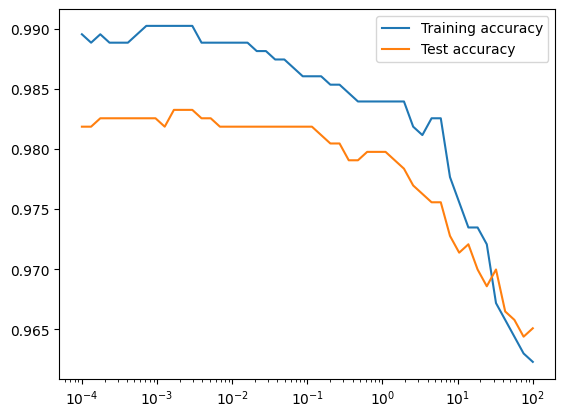

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, stratify=y)


testMean = np.mean(X_test, 0)
testStd = np.std(X_test, 0)
trainMean = np.mean(X_train, 0)
trainStd = np.std(X_train, 0)

testNorm = (X_test - trainMean) / trainStd 
trainNorm = (X_train - trainMean) / trainStd

lambda_interval = np.logspace(-4, 2, 50)
train_accuracy = np.zeros(len(lambda_interval))
test_accuracy = np.zeros(len(lambda_interval))

for i, lamb in enumerate(lambda_interval):
    model = LogisticRegression(penalty="l2", C=1/lamb)
    model.fit(trainNorm, y_train)
    train_prediction = model.score(trainNorm, y_train)
    test_prediction = model.score(testNorm, y_test)

    train_accuracy[i] = train_prediction
    test_accuracy[i] = test_prediction
    
plt.semilogx(lambda_interval, train_accuracy,label="Training Accuracy")
plt.semilogx(lambda_interval, test_accuracy, label="Test Accuracy")
plt.legend(["Training accuracy", "Test accuracy"], loc="upper right")

